In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os
import numpy as np

In [4]:
manga_path = "Data/MAL-manga.csv"
anime_path = "Data/MAL-anime.csv"

manga_df = pd.read_csv(manga_path)
anime_df = pd.read_csv(anime_path)

In [5]:
manga_df = manga_df.drop(columns=['Unnamed: 0', 'page_url',"image_url"])
manga_df = manga_df.rename(columns={"Rank":"Manga Rank","Members":"Manga Votes","Score":"Manga Score"})
manga_df["Type"].unique()

array(['Manga', 'One-shot', 'Manhwa', 'Light-Novel', 'Doujinshi',
       'Manhua', 'Novel'], dtype=object)

In [6]:
anime_df = anime_df.drop(columns=['Unnamed: 0', 'page_url',"image_url"])
anime_df = anime_df.rename(columns={"Rank":"Anime Rank","Members":"Anime Votes","Score":"Anime Score","Type":"Adaptation Type"})
anime_df.head()

,Title,Anime Rank,Adaptation Type,Episodes,Aired,Anime Votes,Anime Score
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,7.55
1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,8.55
2,Templex,11445,Movie,1,2015 - 2015,538,5.29
3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,7.36
4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,6.44


In [7]:
merged_df = pd.merge(anime_df, manga_df, on="Title")
merged_df = merged_df.loc[merged_df["Type"] != "Light-Novel"]
merged_df.head()

,Title,Anime Rank,Adaptation Type,Episodes,Aired,Anime Votes,Anime Score,Manga Rank,Type,Volumes,Published,Manga Votes,Manga Score
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,7.55,4230,Manga,?,Oct 2013 - Jul 2015,5893,7.34
1,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,7.36,11502,Manga,5,May 2001 - Apr 2002,2106,6.78
2,Banana Fish,133,TV,24,Jul 2018 - Dec 2018,814329,8.48,74,Manga,19,Apr 1985 - Mar 1994,52440,8.63
3,Romantic Killer,524,ONA,12,Oct 2022 - Oct 2022,159661,8.06,5801,Manga,4,Jul 2019 - Jun 2020,4953,7.20
4,Keijo!!!!!!!!,4285,TV,12,Oct 2016 - Dec 2016,389224,6.93,4532,Manga,18,Jul 2013 - Apr 2017,12689,7.31


In [8]:
merged_df.to_csv("same_title_adaptations.csv")

In [10]:
anime_vote_df = merged_df.sort_values("Anime Votes", ascending=True)

anime_vote_df.head(10)

,Title,Anime Rank,Adaptation Type,Episodes,Aired,Anime Votes,Anime Score,Manga Rank,Type,Volumes,Published,Manga Votes,Manga Score
1316,Ryou,11110,Movie,1,2014 - 2014,245,5.41,2590,Manga,13,1995 - 1999,1482,7.53
1082,Yahabe,11773,OVA,1,Aug 2012 - Aug 2012,251,5.14,16930,One-shot,?,Aug 2012 - Aug 2012,580,6.16
1947,Yasashii Akuma,9909,ONA,1,Dec 2018 - Dec 2018,344,5.75,12721,Manga,1,1997 -,488,6.69
930,Swimming,11559,Movie,1,2008 - 2008,396,5.25,11708,Manga,1,Jan 2010 - Aug 2013,786,6.77
907,Ganbare! Memeko-chan,11672,OVA,1,Aug 2008 - Aug 2008,405,5.19,7793,Manga,4,Sep 2004 - Apr 2010,298,7.05
576,Shiyakusho,7953,ONA,1,Feb 2022 - Feb 2022,419,6.19,4792,Manga,?,Sep 2013 -,1435,7.29
1879,Portrait,12551,Movie,1,1983 - 1983,421,4.50,7056,One-shot,?,Dec 2016 - Dec 2016,690,7.10
277,Beautiful Name,12234,Movie,1,1979 - 1979,437,4.84,8237,Manga,1,2005 -,1450,7.02
27,Roll,12532,ONA,1,Aug 2014 - Aug 2014,459,4.55,16014,One-shot,?,2007 - 2007,711,6.36
1742,Land,10725,Movie,1,Oct 2013 - Oct 2013,467,5.53,7621,Manga,11,Mar 2014 - Jul 2020,1252,7.06


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1784 entries, 0 to 2088
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1784 non-null   object 
 1   Anime Rank       1784 non-null   int64  
 2   Adaptation Type  1784 non-null   object 
 3   Episodes         1784 non-null   object 
 4   Aired            1784 non-null   object 
 5   Anime Votes      1784 non-null   int64  
 6   Anime Score      1784 non-null   float64
 7   Manga Rank       1784 non-null   int64  
 8   Type             1784 non-null   object 
 9   Volumes          1784 non-null   object 
 10  Published        1784 non-null   object 
 11  Manga Votes      1784 non-null   int64  
 12  Manga Score      1784 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 195.1+ KB


In [12]:
#Are there still anime that is still ongoing 
ongoing_anime = merged_df[merged_df['Episodes'] == '?']['Aired']
ongoing_anime

250     Nov 2013 -
961     Jul 2023 -
1151    Jul 2023 -
1221    Oct 1999 -
1293    Jul 2023 -
1386    Oct 1969 -
1452    Apr 1992 -
1485    Jan 1996 -
Name: Aired, dtype: object

In [13]:
#Create a column that Shows the Status of the Animes that are Ongoing vs Finish

merged_df['Aired Status'] = merged_df['Aired'].apply(lambda x: "Finished" if x.split('-')[1] else "Ongoing")
merged_df[merged_df['Aired Status'] == 'Ongoing'].head()

,Title,Anime Rank,Adaptation Type,Episodes,Aired,Anime Votes,Anime Score,Manga Rank,Type,Volumes,Published,Manga Votes,Manga Score,Aired Status
250,Granblue Fantasy,7308,ONA,?,Nov 2013 -,7235,6.32,13306,Manga,7,May 2016 - Dec 2019,2388,6.64,Ongoing
285,Watashi no Shiawase na Kekkon,506,TV,12,Jul 2023 -,76162,8.07,1384,Novel,?,Jan 2019 -,2229,7.77,Ongoing
286,Watashi no Shiawase na Kekkon,506,TV,12,Jul 2023 -,76162,8.07,754,Manga,?,Dec 2018 -,11823,7.98,Ongoing
415,"Jitsu wa Ore, Saikyou deshita?",4811,TV,12,Jul 2023 -,53364,6.82,13919,Manga,?,Apr 2019 -,12855,6.59,Ongoing
426,Zom 100: Zombie ni Naru made ni Shitai 100 no ...,4721,TV,12,Jul 2023 -,102803,6.86,2387,Manga,?,Oct 2018 -,32212,7.57,Ongoing


In [44]:
#Create a DataFrame that narrows the columns 
title_status = merged_df[['Title','Adaptation Type','Aired','Aired Status','Anime Votes']]

title_status.head(10)

,Title,Adaptation Type,Aired,Aired Status,Anime Votes
0,Net-juu no Susume,TV,Oct 2017 - Dec 2017,Finished,450968
1,s.CRY.ed,TV,Jul 2001 - Dec 2001,Finished,81283
2,Banana Fish,TV,Jul 2018 - Dec 2018,Finished,814329
3,Romantic Killer,ONA,Oct 2022 - Oct 2022,Finished,159661
4,Keijo!!!!!!!!,TV,Oct 2016 - Dec 2016,Finished,389224
5,Toaru Majutsu no Index,TV,Oct 2008 - Mar 2009,Finished,791235
7,Kobato.,TV,Oct 2009 - Mar 2010,Finished,163055
8,Muhyo to Rouji no Mahouritsu Soudan Jimusho,TV,Aug 2018 - Oct 2018,Finished,51328
9,Children,ONA,Jun 2011 - Jun 2011,Finished,3011
10,"Kono Healer, Mendokusai",TV,Apr 2022 - Jun 2022,Finished,53570


In [24]:
title_status.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1784 entries, 0 to 2088
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1784 non-null   object
 1   Aired         1784 non-null   object
 2   Aired Status  1784 non-null   object
 3   Anime Votes   1784 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 69.7+ KB


In [112]:
sort_title = title_status.sort_values("Anime Votes", ascending=False)[:20]
sort_title.head(20)

,Title,Adaptation Type,Aired,Aired Status,Anime Votes
971,Shingeki no Kyojin,TV,Apr 2013 - Sep 2013,Finished,3759013
498,Death Note,TV,Oct 2006 - Jun 2007,Finished,3727021
12,Boku no Hero Academia,TV,Apr 2016 - Jun 2016,Finished,2893115
945,Kimetsu no Yaiba,TV,Apr 2019 - Sep 2019,Finished,2827376
806,Naruto,TV,Oct 2002 - Feb 2007,Finished,2727570
805,Naruto,TV,Oct 2002 - Feb 2007,Finished,2727570
1169,Tokyo Ghoul,TV,Jul 2014 - Sep 2014,Finished,2708236
1167,Tokyo Ghoul,TV,Jul 2014 - Sep 2014,Finished,2708236
1675,Kimi no Na wa.,Movie,Aug 2016 - Aug 2016,Finished,2608836
1744,Steins;Gate,TV,Apr 2011 - Sep 2011,Finished,2449954


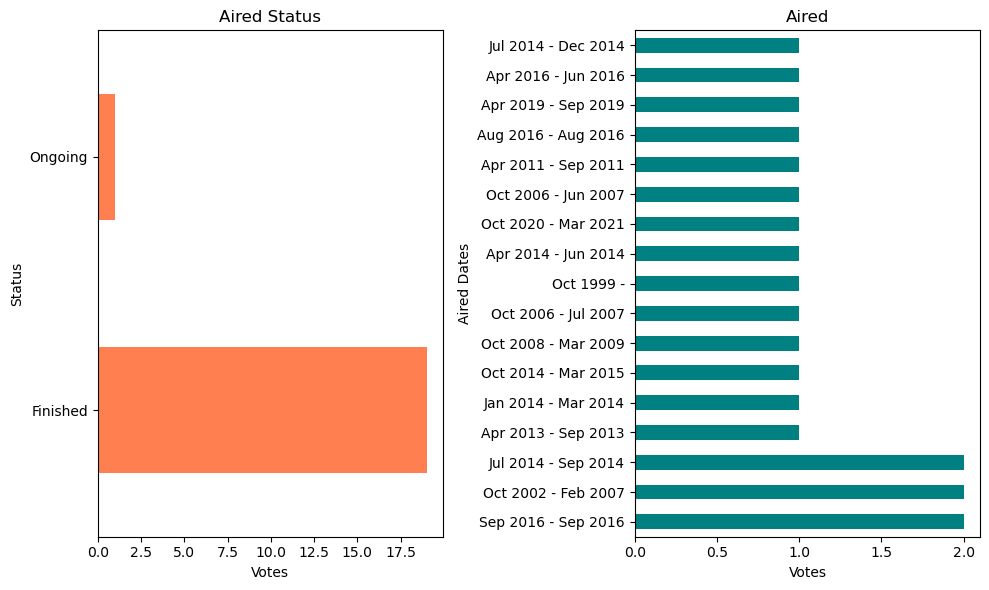

In [206]:
#Member Votes vs Air Status and Air Dates 

y1 = sort_title['Aired Status']
y2 = sort_title['Aired']

# Plot bar charts
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

sort_title['Aired Status'].value_counts().plot(kind='barh', ax=axes[0], color='coral')
axes[0].set_title('Aired Status')
axes[0].set_xlabel('Votes')
axes[0].set_ylabel('Status')

sort_title['Aired'].value_counts().plot(kind='barh', ax=axes[1], color='teal')
axes[1].set_title('Aired')
axes[1].set_xlabel('Votes')
axes[1].set_ylabel('Aired Dates')

plt.tight_layout()
plt.show()

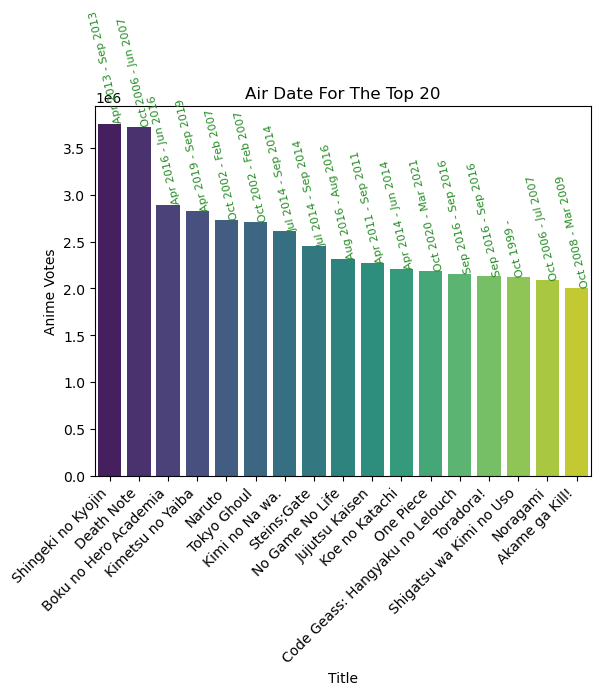

In [192]:
ax = sns.barplot(x='Title', y='Anime Votes', data=sort_title, palette='viridis')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
# Add data labels to the top of each bar
for p, val in zip(ax.patches, sort_title['Aired']):
    x = p.get_x() + p.get_width() / 3.
    y = p.get_height() + 1 # Add an offset of 0.5 to position slightly above the bar
    ax.annotate(str(val), (x, y),
                ha='center', va='bottom', fontsize=8, rotation= 103, color='forestgreen')  
    
plt.title("Air Date For The Top 20")
plt.show()

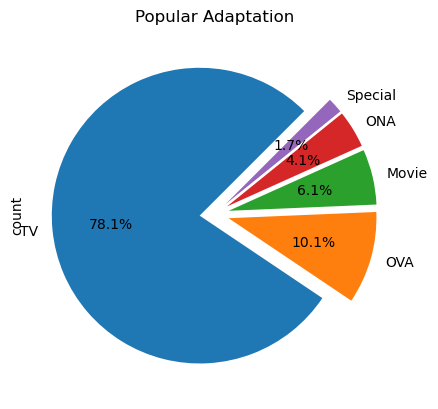

In [196]:
status_counts = title_status['Adaptation Type'].value_counts()
explode = [0.1,0.1,0.1,0.1,0.1]  # Example explode values, adjust as needed

status_counts.plot.pie(autopct='%1.1f%%', startangle=45, explode=explode)
plt.title("Popular Adaptation")
plt.show()